<a href="https://colab.research.google.com/github/Talha-coder-01/AI-ML-Projects/blob/main/Sentiment_Analysis_IMDB_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the IMDB dataset
vocab_size = 10000  # We'll use the top 10,000 most frequent words
max_length = 250    # Maximum length of each review
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Pad sequences to ensure all inputs have the same length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [6]:
# Build the model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 406ms/step - accuracy: 0.6203 - loss: 0.6307 - val_accuracy: 0.7704 - val_loss: 0.4752
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 407ms/step - accuracy: 0.8327 - loss: 0.3917 - val_accuracy: 0.8250 - val_loss: 0.4001
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 414ms/step - accuracy: 0.8690 - loss: 0.3227 - val_accuracy: 0.8258 - val_loss: 0.3981
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 412ms/step - accuracy: 0.8893 - loss: 0.2815 - val_accuracy: 0.8298 - val_loss: 0.3984
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 415ms/step - accuracy: 0.9035 - loss: 0.2517 - val_accuracy: 0.8170 - val_loss: 0.4354
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 436ms/step - accuracy: 0.9083 - loss: 0.2374 - val_accuracy: 0.8222 - val_loss: 0.4244
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 404ms/step - accuracy: 0.9198 - loss: 0.2179 - val_accuracy: 0.8108 - val_loss: 0.4424
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 415ms/step - accuracy: 0.9168 - loss: 0

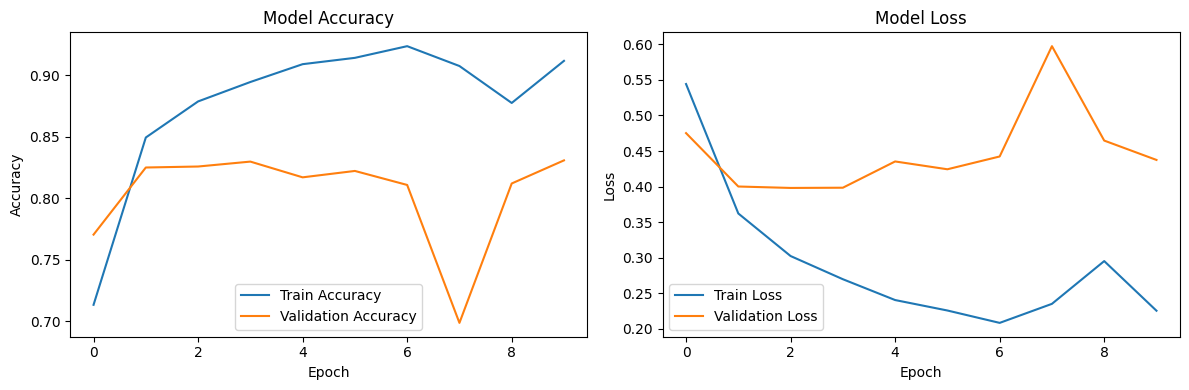

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Function to predict sentiment
def predict_sentiment(text):
    # Convert text to sequence of word indices
    sequence = imdb.get_word_index()
    sequence = {k:(v+3) for k,v in sequence.items()}
    sequence["<PAD>"] = 0
    sequence["<START>"] = 1
    sequence["<UNK>"] = 2
    sequence["<UNUSED>"] = 3

    words = text.lower().split()
    sequence = [sequence.get(word, 2) for word in words]
    sequence = pad_sequences([sequence], maxlen=max_length)

    prediction = model.predict(sequence)[0][0]
    return "Positive" if prediction > 0.5 else "Negative", prediction

In [14]:
# Test the model with some sample reviews
sample_reviews = [
    "This movie was fantastic! I really enjoyed every moment of it.",
    "What a terrible waste of time. I hated this film.",
    "The acting was okay, but the plot was confusing.",
    "A masterpiece of modern cinema. Absolutely brilliant!"
]

for review in sample_reviews:
    sentiment, score = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment} (score: {score:.4f})")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Review: This movie was fantastic! I really enjoyed every moment of it.
Sentiment: Positive (score: 0.5907)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: What a terrible waste of time. I hated this film.
Sentiment: Negative (score: 0.0155)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: The acting was okay, but the plot was confusing.
Sentiment: Negative (score: 0.1514)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Review: A masterpiece of modern cinema. Absolutely brilliant!
Sentiment: Positive (score: 0.5891)
